In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
data = pd.read_csv('Historical Product Demand.csv')
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 40.0+ MB


In [105]:
data.describe()

,Order_Demand
count,1.048575e+06
mean,4.906977e+03
std,2.892678e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [106]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1037336 non-null  object
 1   Warehouse         1037336 non-null  object
 2   Product_Category  1037336 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1037336 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 47.5+ MB


In [107]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
ts = data.groupby('Date')['Order_Demand'].sum()
ts.head()

Date
2011-01-08        2
2011-05-31      108
2011-06-24    92000
2011-09-02     1250
2011-09-27       28
Name: Order_Demand, dtype: int64

In [108]:
#ts.set_index('Date', inplace=True)
#ts.head()

In [109]:
#ts.columns

In [110]:
sns.set(rc={'figure.figsize':(20, 8)})

Text(0, 0.5, 'Order_Demand')

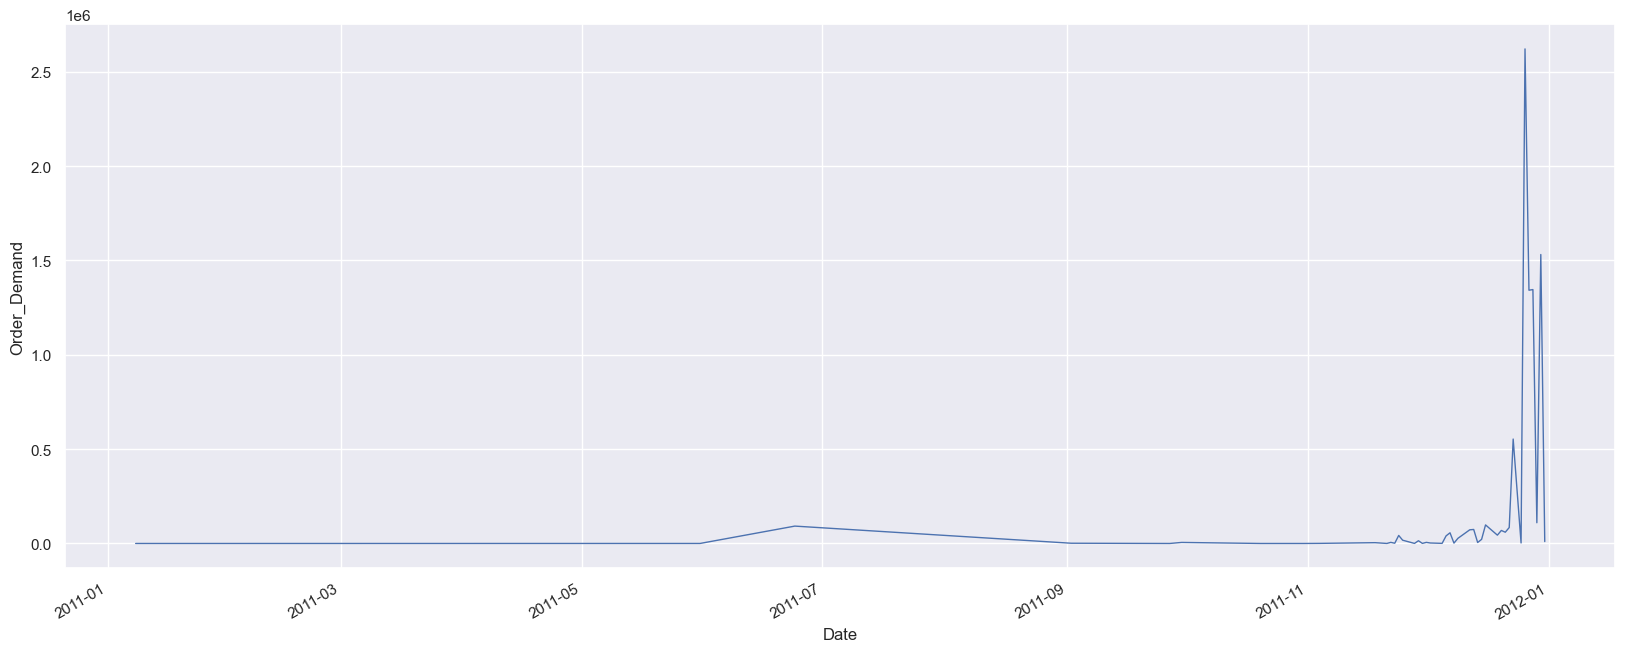

In [111]:
# Biểu đồ về số lượng đơn đặt hàng năm 2011
ax = ts.loc['2011'].plot(linewidth=1)
ax.set_ylabel('Order_Demand')

Text(0, 0.5, 'Order_Demand')

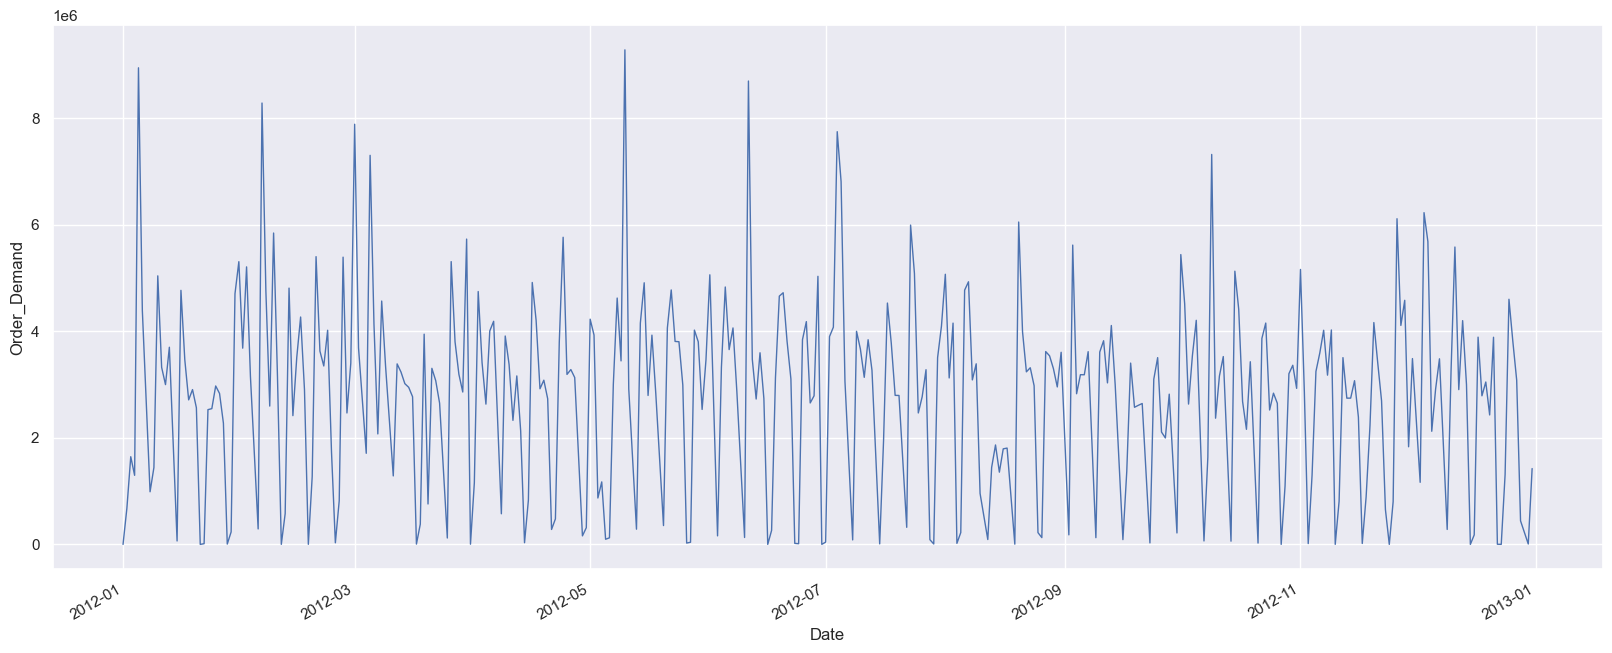

In [112]:
# Biểu đồ về số lượng đơn đặt hàng năm 2012
ax = ts.loc['2012'].plot(linewidth=1)
ax.set_ylabel('Order_Demand')

Text(0, 0.5, 'Order_Demand')

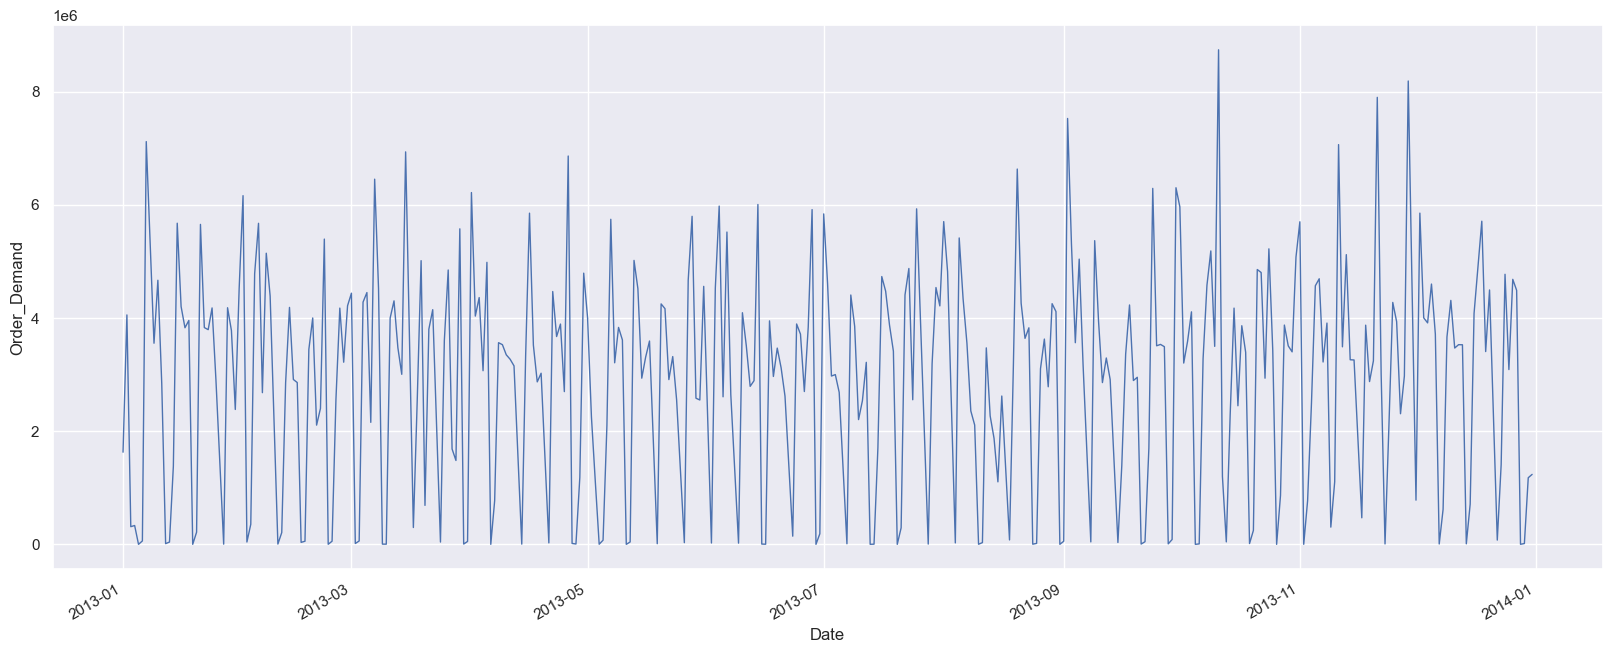

In [113]:
# Biểu đồ về số lượng đơn đặt hàng năm 2013
ax = ts.loc['2013'].plot(linewidth=1)
ax.set_ylabel('Order_Demand')

Text(0, 0.5, 'Order_Demand')

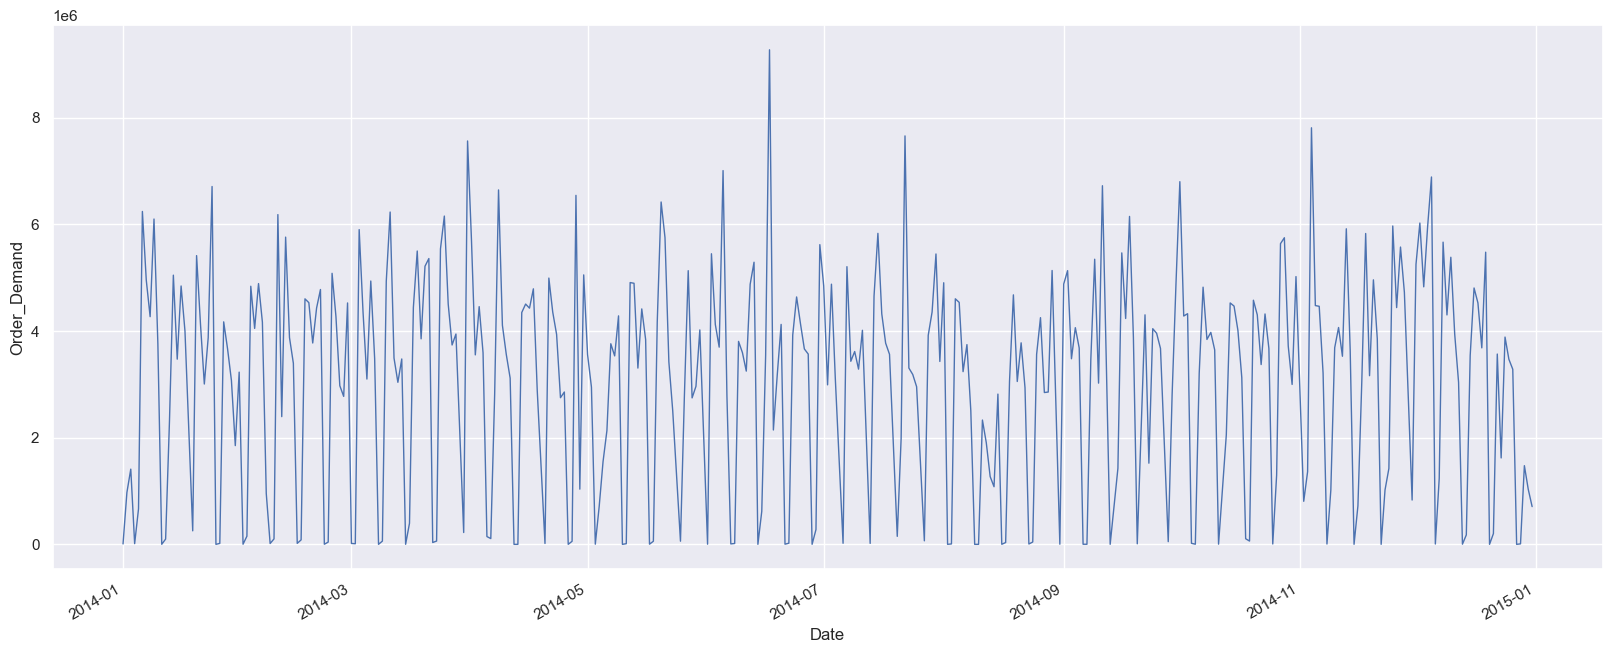

In [114]:
# Biểu đồ về số lượng đơn đặt hàng năm 2014
ax = ts.loc['2014'].plot(linewidth=1)
ax.set_ylabel('Order_Demand')

Text(0, 0.5, 'Order_Demand')

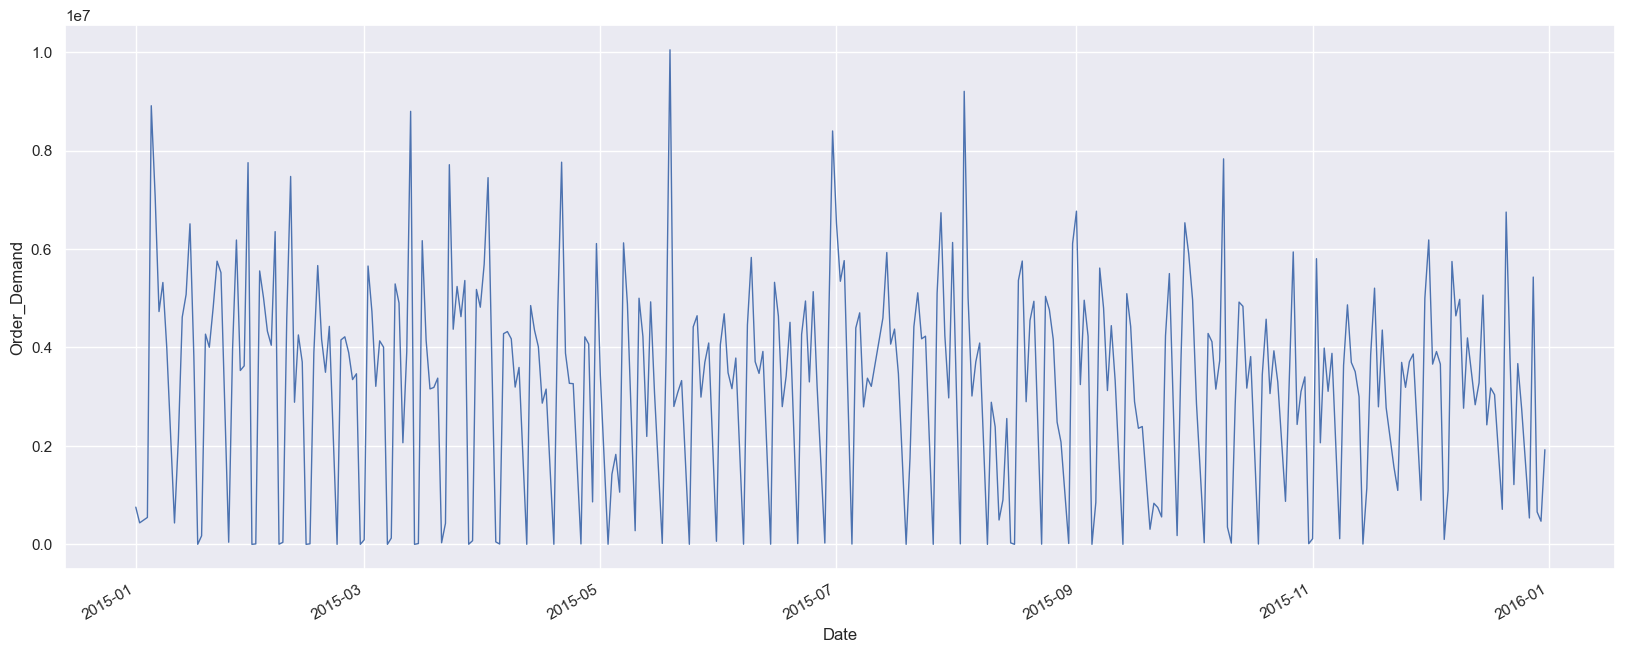

In [115]:
# Biểu đồ về số lượng đơn đặt hàng năm 2015
ax = ts.loc['2015'].plot(linewidth=1)
ax.set_ylabel('Order_Demand')

Text(0, 0.5, 'Order_Demand')

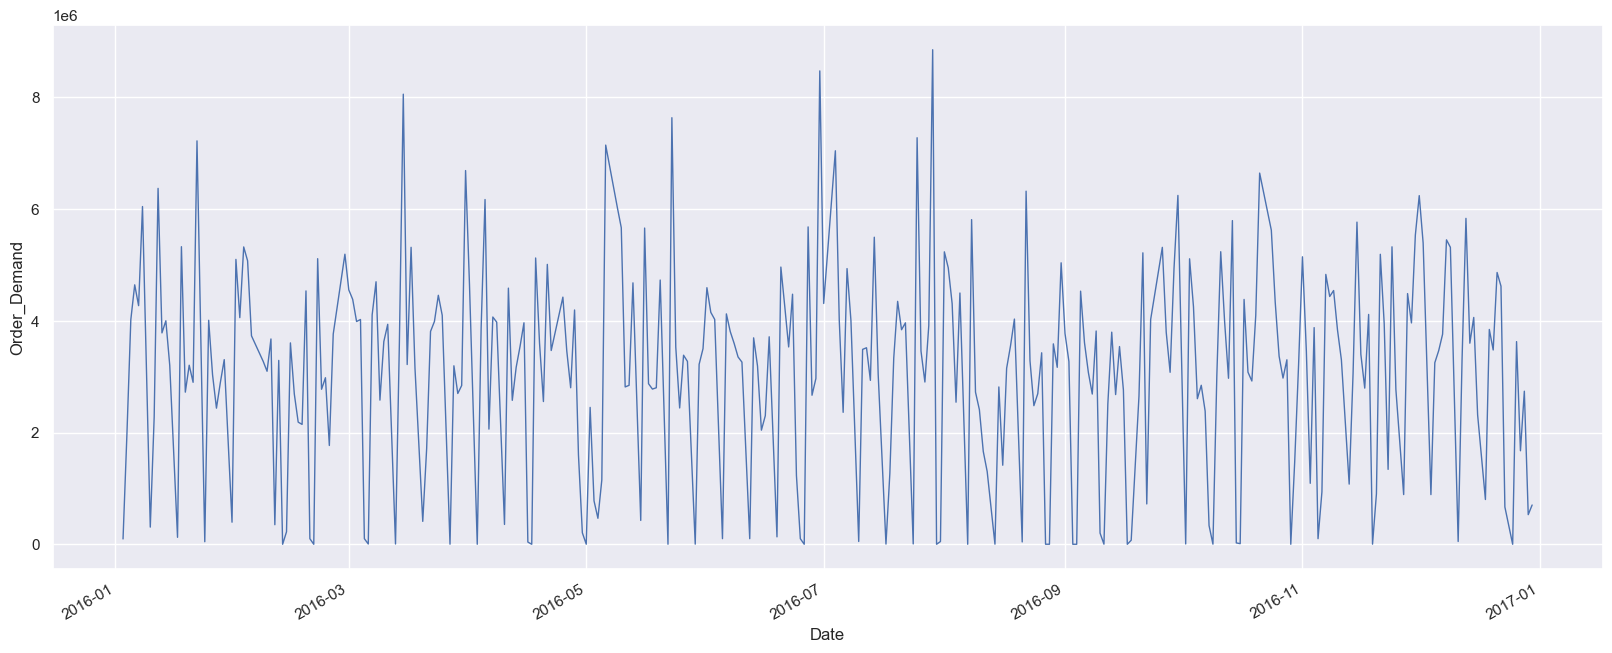

In [116]:
# Biểu đồ về số lượng đơn đặt hàng năm 2016
ax = ts.loc['2016'].plot(linewidth=1)
ax.set_ylabel('Order_Demand')

Text(0, 0.5, 'Order_Demand')

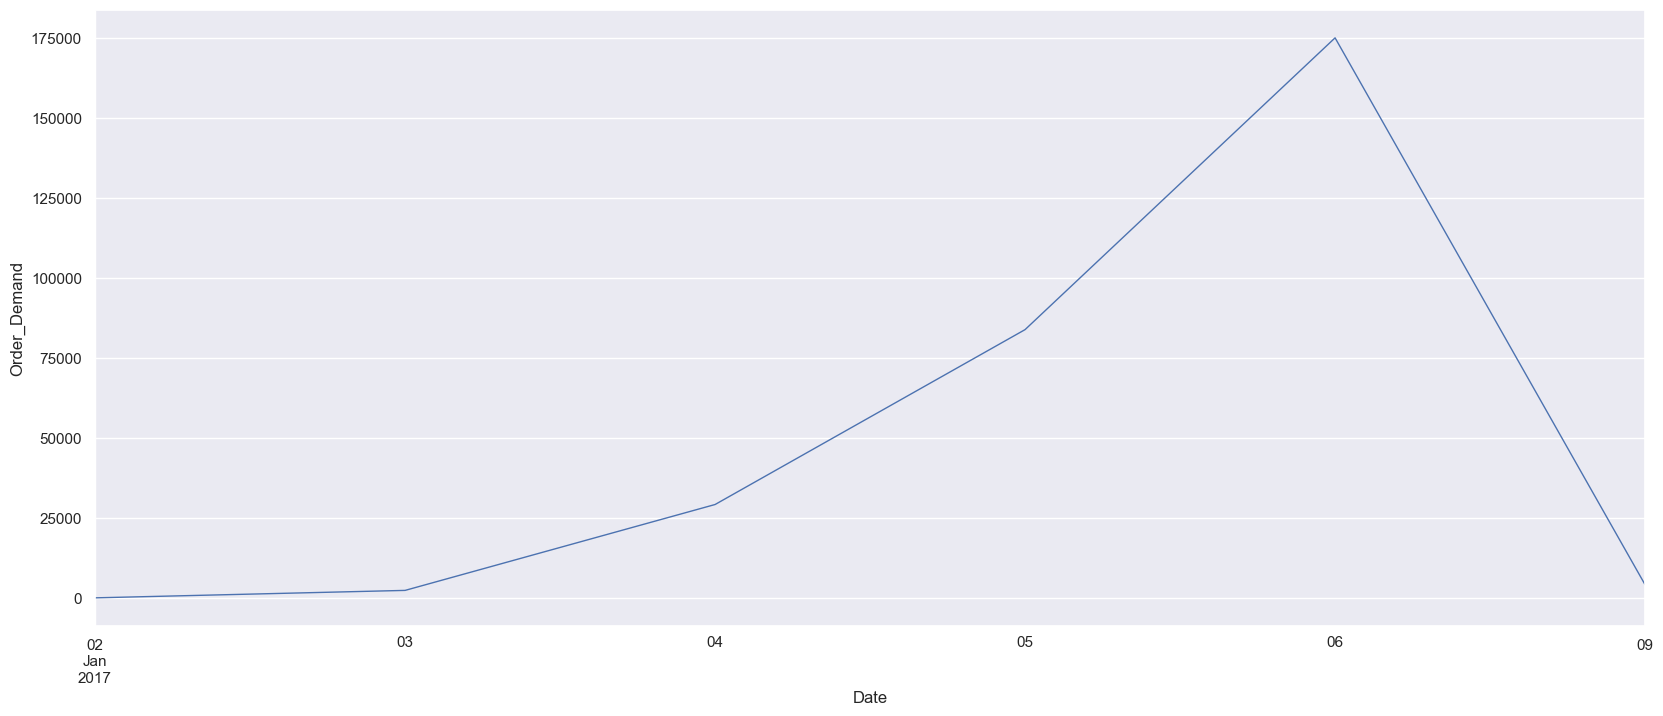

In [117]:
# Biểu đồ về số lượng đơn đặt hàng năm 2017
ax = ts.loc['2017'].plot(linewidth=1)
ax.set_ylabel('Order_Demand')

In [131]:
ts['2015-03']

Date
2015-03-01      91883
2015-03-02    5655033
2015-03-03    4727143
2015-03-04    3210698
2015-03-05    4134950
2015-03-06    4007336
2015-03-07          0
2015-03-08     126356
2015-03-09    5291369
2015-03-10    4903689
2015-03-11    2064053
2015-03-12    3914391
2015-03-13    8797960
2015-03-14         50
2015-03-15      15756
2015-03-16    6170118
2015-03-17    4146970
2015-03-18    3157966
2015-03-19    3188151
2015-03-20    3377140
2015-03-21      32010
2015-03-22     426704
2015-03-23    7713802
2015-03-24    4371097
2015-03-25    5239455
2015-03-26    4626157
2015-03-27    5360937
2015-03-28       2000
2015-03-29      74447
2015-03-30    5178919
2015-03-31    4818657
Name: Order_Demand, dtype: int64

In [119]:
print(type(ts))

<class 'pandas.core.series.Series'>


In [120]:
ts.index = pd.to_datetime(ts.index)

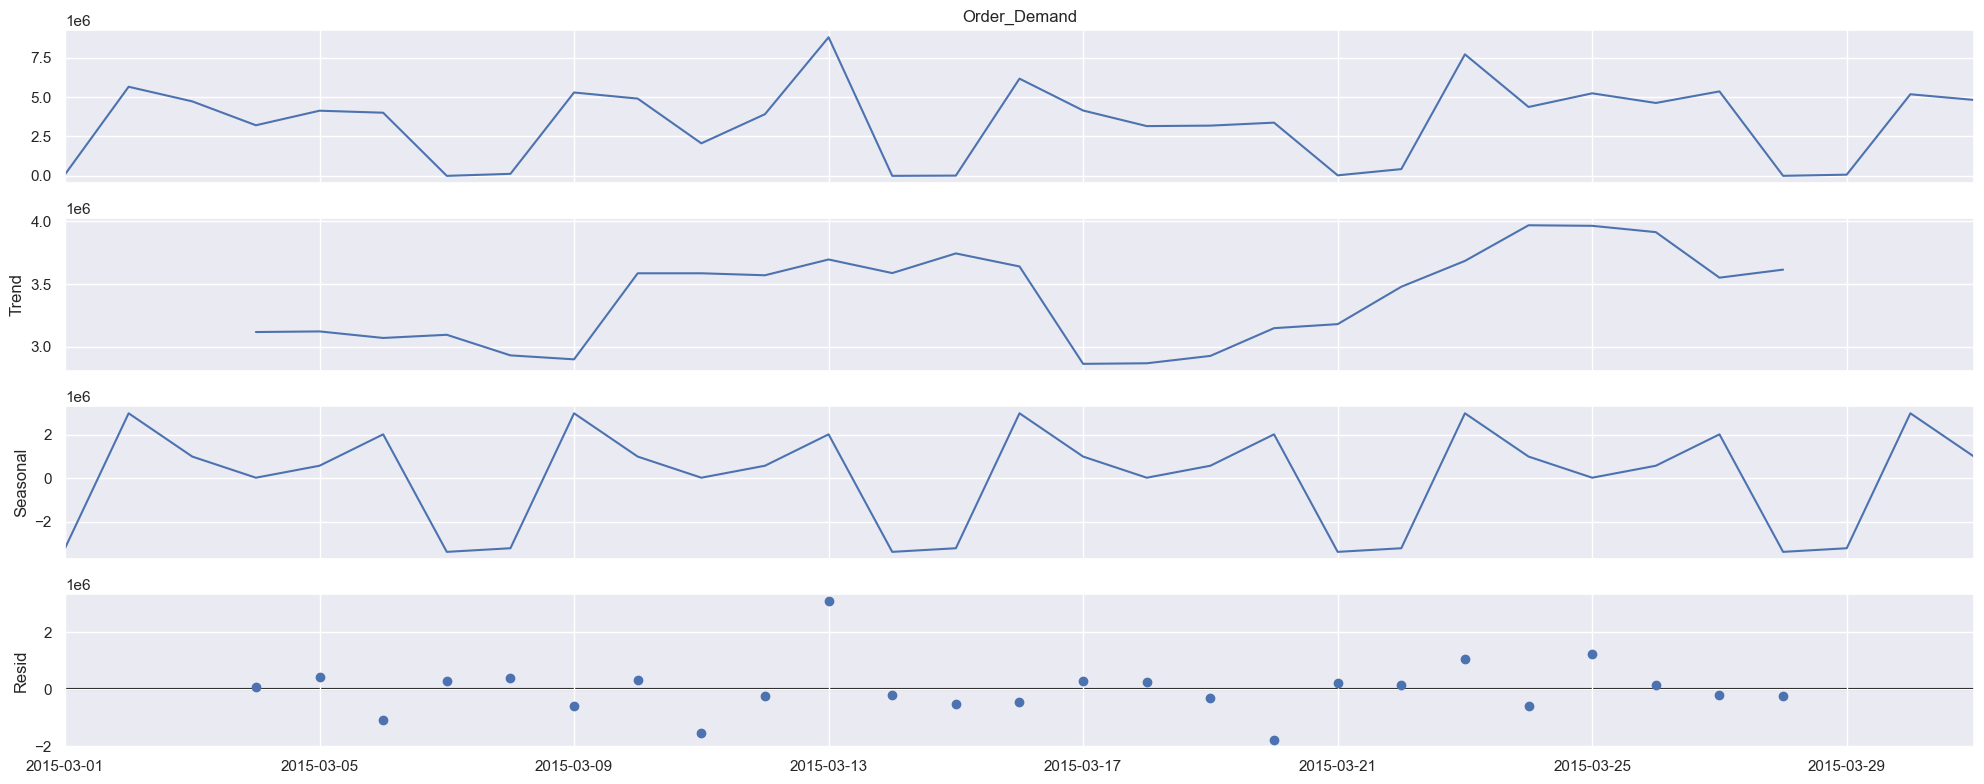

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose

#fig.set_size_inches(18, 20)

# Phân tách thành phần Trend, Seasional, Residual của chuỗi dữ liệu với đặc trưng Order Demand trong tháng 07-2012
result = seasonal_decompose(ts['2015-03'], model='additive')
fig = result.plot()

Text(0, 0.5, 'Order_Demand')

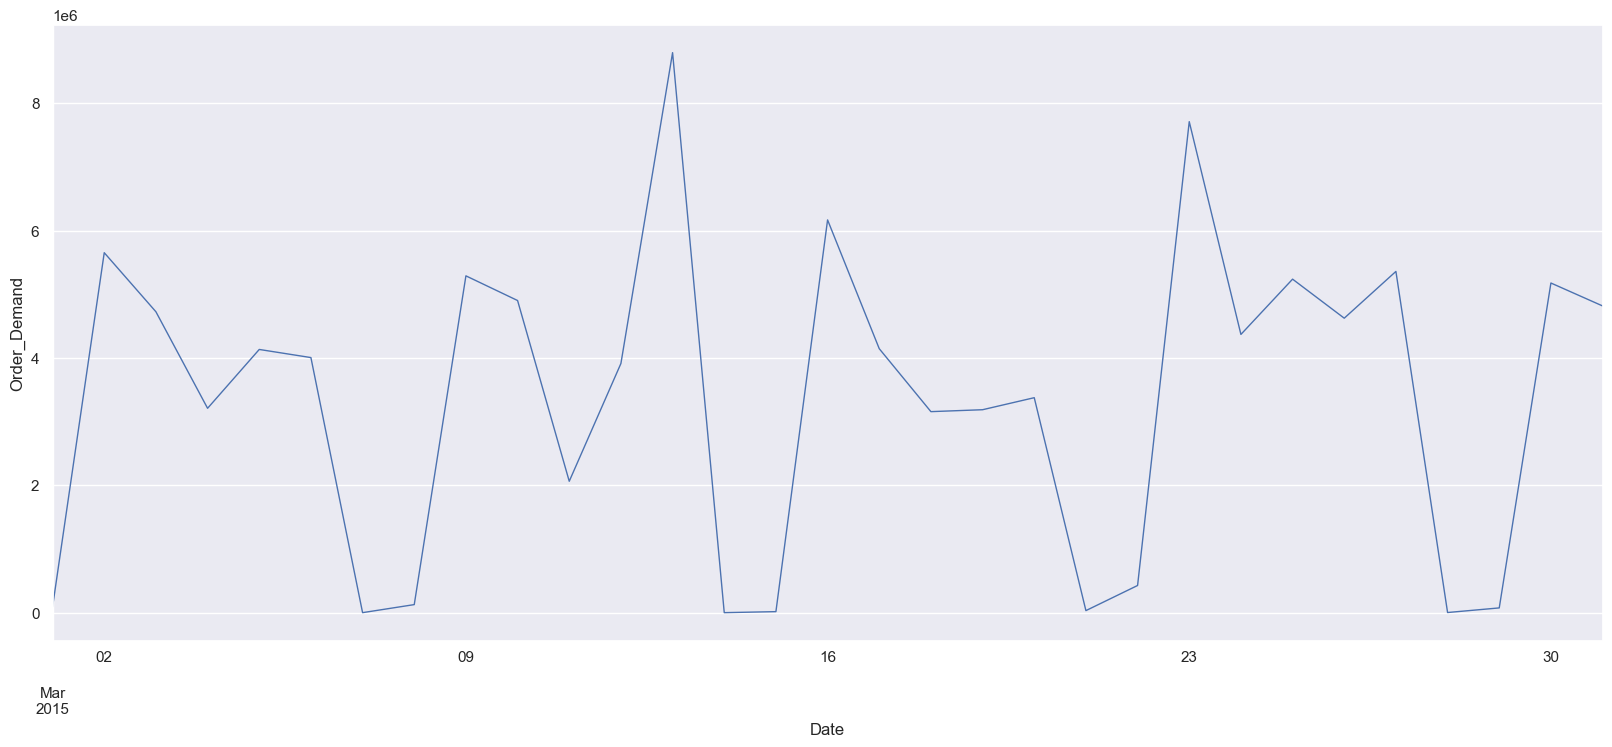

In [132]:
# Biểu đồ về số lượng đơn đặt hàng tháng 3 năm 2015
ax = ts.loc['2015-03'].plot(linewidth=1)
ax.set_ylabel('Order_Demand')

Nhận xét và phân tích:

* Chuỗi dữ liệu trên thể hiện tính mùa (Seasionality) rất rõ ràng, tính khuynh (Trend) của chuỗi dữ liệu hầu như không có. 
* Số lượng tổng đơn đặt hàng ở mỗi ngày là khác nhau có ngày lên tới triệu đơn đặt hàng, có ngày chỉ có vài trăm nghìn đơn hoặc ít hơn -> không thể hiện tính Trend là lí do này
* Số lượng đơn ít nhất trong tháng: 0 
* Số lượng đơn nhiều nhất trong tháng: 9.5 triệu đơn